<a href="https://colab.research.google.com/github/aisyashlf/UAS-AMS/blob/main/Code_UAS_AMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisis Sentimen terhadap Brand Fashion Lokal yang Dibandingkan dengan Uniqlo di Media Sosial**

| NIM | Nama | Kontribusi |
| -------- | -------- | --------|
|11220940000032   | Aisya Shalifa  | Scrapping Data, Preprocessing, EDA, Presentasi |
|11220940000033   | Arjuananta Malik  | Preprocessing, EDA, PPT, Presentasi |
|11220940000048   | Reyhan Maulana Aryaduta | Prepocessing, EDA, PPT |
|11220940000074   | Rachmat Nadhif | EDA, PPT, Presentasi |

# Import hasil scrapping data dan pemilihan fitur yang akan digunakan dalam analisis

In [ ]:
import pandas as pd

In [ ]:
# Instagram
instagram = pd.read_excel("https://raw.githubusercontent.com/aisyashlf/UAS-AMS/e1f77e98df2809800f33d2ea1fdd53cb44a6c0ce/instagram.xlsx")

# TikTok
tiktok = pd.read_excel("https://raw.githubusercontent.com/aisyashlf/UAS-AMS/e1f77e98df2809800f33d2ea1fdd53cb44a6c0ce/tiktok2.xlsx")

# Twitter
twitter = pd.read_excel("https://raw.githubusercontent.com/aisyashlf/UAS-AMS/e1f77e98df2809800f33d2ea1fdd53cb44a6c0ce/twitter.xlsx")

In [ ]:
tiktok.info()
instagram.info()
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4755 entries, 0 to 4754
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   platform  4755 non-null   object 
 1   link      4755 non-null   object 
 2   time      4755 non-null   object 
 3   username  4755 non-null   object 
 4   like      4755 non-null   int64  
 5   reply     4534 non-null   float64
 6   comment   4755 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 260.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   platform  93 non-null     object
 1   link      93 non-null     object
 2   time      93 non-null     object
 3   username  93 non-null     object
 4   like      93 non-null     int64 
 5   reply     93 non-null     int64 
 6   comment   93 non-null     object
dtypes: int64(2), object(5)
memory 

## Menyesuaikan format waktu pada data

In [ ]:
tiktok['time'].head()

,time
0,2024-04-13T09:39:25.000Z
1,2024-04-13T09:32:37.000Z
2,2024-04-13T06:54:02.000Z
3,2024-04-13T05:51:50.000Z
4,2024-04-13T05:54:21.000Z


In [ ]:
from datetime import datetime, timedelta

# Daftar timestamp dalam milidetik
timestamps_ms = twitter['time']

# Konversi ke datetime WIB
timestamps_wib = []
for ts in timestamps_ms:
    # Bagi 1000 untuk dapat detik
    dt_utc = datetime.utcfromtimestamp(ts / 1000)
    dt_wib = dt_utc + timedelta(hours=7)
    timestamps_wib.append(dt_wib.strftime('%d-%m-%Y'))


twitter['time'] = timestamps_wib

In [ ]:
instagram['time'] = pd.to_datetime(instagram['time']).dt.strftime('%d-%m-%Y')
tiktok['time'] = pd.to_datetime(tiktok['time']).dt.strftime('%d-%m-%Y')

In [ ]:
instagram['time'] = pd.to_datetime(instagram['time'], format='%d-%m-%Y')
tiktok['time'] = pd.to_datetime(tiktok['time'], format='%d-%m-%Y')
twitter['time']  = pd.to_datetime(twitter['time'], format='%d-%m-%Y')

## Mengatasi data duplikat dan nilai yang kosong

In [ ]:
instagram.duplicated().sum()

np.int64(0)

In [ ]:
twitter.duplicated().sum()

np.int64(8)

In [ ]:
tiktok.duplicated().sum()

np.int64(245)

In [ ]:
tiktok = tiktok.drop_duplicates()
twitter = twitter.drop_duplicates()

In [ ]:
instagram.isnull().sum()

,0
platform,0
link,0
time,0
username,0
like,0
reply,0
comment,0


In [ ]:
tiktok.isnull().sum()

,0
platform,0
link,0
time,0
username,0
like,0
reply,221
comment,0


In [ ]:
twitter.isnull().sum()

,0
platform,0
link,0
time,0
username,6
like,6
reply,6
comment,6


In [ ]:
tiktok['reply']=tiktok['reply'].fillna(0)
twitter = twitter.dropna()

/tmp/ipython-input-16-906450881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tiktok['reply']=tiktok['reply'].fillna(0)


## Gabung data dari ke 3 platform media sosial

In [ ]:
df = pd.concat([instagram, tiktok, twitter])

# Preprocessing

In [ ]:
#ukuran data setelah digabung
df.shape

(5982, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5982 entries, 0 to 1392
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   platform  5982 non-null   object        
 1   link      5982 non-null   object        
 2   time      5982 non-null   datetime64[ns]
 3   username  5982 non-null   object        
 4   like      5982 non-null   float64       
 5   reply     5982 non-null   float64       
 6   comment   5982 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 373.9+ KB


In [ ]:
df['like'] = df['like'].astype(int)
df['reply'] = df['reply'].astype(int)
df['platform'] = df['platform'].astype('category')
df['comment'] = df['comment'].astype(str)

In [ ]:
df.dtypes

,0
platform,category
link,object
time,datetime64[ns]
username,object
like,int64
reply,int64
comment,object


In [ ]:
#ubah tipe data pada kolom comment
df['comment'] = df['comment'].astype(str)

In [ ]:
#cek duplikat kembali setelah data digabung
df.duplicated().sum()

np.int64(30)

In [ ]:
# buang data duplikat
df.drop_duplicates(inplace=True)

In [ ]:
# buang missing values
df.dropna(inplace=True)

## Bersihkan comment dari emoji, url, angka, dll

In [ ]:
# Import modul yang diperlukan
import re
import string
import nltk

def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)

def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'', text)

def remove_emoji(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
                            "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_username(text):
    username_pattern = re.compile(r'@\w+')
    return username_pattern.sub(r'', text)

def remove_symbols(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

def remove_numbers(text):  # Fungsi tambahan
    return re.sub(r'\d+', '', text)

# Preprocessing pipeline
df['clean_text'] = df['comment'].apply(lambda x: remove_URL(x))
df['clean_text'] = df['clean_text'].apply(lambda x: remove_html(x))
df['clean_text'] = df['clean_text'].apply(lambda x: remove_emoji(x))
df['clean_text'] = df['clean_text'].apply(lambda x: remove_username(x))
df['clean_text'] = df['clean_text'].apply(lambda x: remove_symbols(x))
df['clean_text'] = df['clean_text'].apply(lambda x: remove_numbers(x))

df.head(10)

,platform,link,time,username,like,reply,comment,clean_text
0,instagram,https://www.instagram.com/reel/DCtrpwDvTS_/?ig...,2024-11-23,novoidminds,20,1,❄️❄️❄️,
1,instagram,https://www.instagram.com/reel/DCtrpwDvTS_/?ig...,2025-05-05,saski_a3977,0,2,Beli kaos di TshirtfI lagi diskon hingga 40% +...,Beli kaos di TshirtfI lagi diskon hingga vou...
2,instagram,https://www.instagram.com/reel/DCtrpwDvTS_/?ig...,2025-03-13,santoso_jawir,0,0,@anissabbella,
3,instagram,https://www.instagram.com/reel/DCtrpwDvTS_/?ig...,2024-12-30,agungjabrex92_,0,0,perbanyak review kaos yg cuttingan reguler bang🙌,perbanyak review kaos yg cuttingan reguler bang
4,instagram,https://www.instagram.com/reel/DCtrpwDvTS_/?ig...,2024-12-18,raflylumangkun,0,0,@franlyyyyy,
5,instagram,https://www.instagram.com/reel/DCtrpwDvTS_/?ig...,2024-12-04,bems_purnanto,0,0,🔥🔥🔥,
6,instagram,https://www.instagram.com/reel/DCtrpwDvTS_/?ig...,2024-11-28,ciwideysecondbranded,0,0,Kada ada seller nakal nih mumpung lagi live bi...,Kada ada seller nakal nih mumpung lagi live bi...
7,instagram,https://www.instagram.com/reel/DCtrpwDvTS_/?ig...,2024-11-28,ciwideysecondbranded,0,0,Kak ada seller nakal nih di shopee yang hancur...,Kak ada seller nakal nih di shopee yang hancur...
8,instagram,https://www.instagram.com/reel/DCtrpwDvTS_/?ig...,2024-11-28,decal_custom_srblwn,0,0,Bang kalo dimarket place yg warna hitam nama n...,Bang kalo dimarket place yg warna hitam nama n...
9,instagram,https://www.instagram.com/reel/DCtrpwDvTS_/?ig...,2024-11-27,jocab.santosa,0,0,dion lempar sini satu 😂,dion lempar sini satu


In [ ]:
# Bersihkan baris yang kosong string setelah strip
df['clean_text'] = df['clean_text'].astype(str)  # pastikan tipe string
df = df[df['clean_text'].str.strip() != '']      # hapus baris kosong

# (Opsional) Reset index
df = df.reset_index(drop=True)

In [ ]:
df.shape

(5355, 8)

In [ ]:
df.head(5)

,platform,link,time,username,like,reply,comment,clean_text
0,instagram,https://www.instagram.com/reel/DCtrpwDvTS_/?ig...,2025-05-05,saski_a3977,0,2,Beli kaos di TshirtfI lagi diskon hingga 40% +...,Beli kaos di TshirtfI lagi diskon hingga vou...
1,instagram,https://www.instagram.com/reel/DCtrpwDvTS_/?ig...,2024-12-30,agungjabrex92_,0,0,perbanyak review kaos yg cuttingan reguler bang🙌,perbanyak review kaos yg cuttingan reguler bang
2,instagram,https://www.instagram.com/reel/DCtrpwDvTS_/?ig...,2024-11-28,ciwideysecondbranded,0,0,Kada ada seller nakal nih mumpung lagi live bi...,Kada ada seller nakal nih mumpung lagi live bi...
3,instagram,https://www.instagram.com/reel/DCtrpwDvTS_/?ig...,2024-11-28,ciwideysecondbranded,0,0,Kak ada seller nakal nih di shopee yang hancur...,Kak ada seller nakal nih di shopee yang hancur...
4,instagram,https://www.instagram.com/reel/DCtrpwDvTS_/?ig...,2024-11-28,decal_custom_srblwn,0,0,Bang kalo dimarket place yg warna hitam nama n...,Bang kalo dimarket place yg warna hitam nama n...


In [ ]:
# save data ke csv
df.to_csv('/content/lokal_mirip_uniqlo.csv', index=False)

## Benerin Slank dan Labeling
pada link berikut :[spreadsheet](https://docs.google.com/spreadsheets/d/1B0Yn8vrR-XclkY7PTu0iPMxqXlO0Vi7OrQm15VuTlLE/edit?usp=sharing)

Kami menambahkan label sentimen: -1 (negatif), 0 (netral), 1 (positif), serta menambahkan kolom untuk label brand fashion yang muncul di teks nya


setelah data diberi label sentimen dan diperbaiki slang. import kembali datanya

## import ulang data dari spreadsheet

In [ ]:
file_id = '1B0Yn8vrR-XclkY7PTu0iPMxqXlO0Vi7OrQm15VuTlLE'
url = f'https://docs.google.com/spreadsheets/d/{file_id}/export?format=csv'

try :
  df = pd.read_csv(url, low_memory=False, encoding='utf8')
except Exception as e:
    print(f"Error loading or processing data: {e}")
    raise

df['text_noslank'] = df['text_noslank'].replace({'nomor': 'no', 'hg': 'humangreatness', 'uni':'uniqlo', 'nvm':'novoidminds',
                                                 'oke':'bagus', 'ok':'bagus', 'blbagus':'bagus', 'i wear':'iwear',
                                                 't shirt':'kaos', 'cakep':'bagus', 'second':'threesecond', 'mindss':'minds',
                                                 'dbagus':'bagus', 'tshirt':'kaos', 'uniqloqlo':'uniqlo', 'lbagusal':'bagus',
                                                 'kbagus':'bagus', 'dbagus':'bagus', 'pdhal':'padahal', 'common goods':'commongoods',
                                                 'novoid':'novoidminds', 'ijo':'tokopedia', 'human greatness':'humangreatness',
                                                 'baguss':'bagus', 'bagusss':'bagus','baguss':'bagus', 'no void minds':'novoidminds', 'goodsnya':'goods', 'males':'malas'}, regex=True)
df['brand'] = df['brand'].replace({'common goods':'commongoods', 'no void minds':'novoidminds', 'human greatness':'humangreatness'}, regex=True)

df

,platform,link,time,username,like,reply,comment,clean_text,text_noslank,sentimen,brand
0,instagram,https://www.instagram.com/reel/DCtrpwDvTS_/?ig...,2025-05-05,saski_a3977,0,2,Beli kaos di TshirtfI lagi diskon hingga 40% +...,Beli kaos di TshirtfI lagi diskon hingga vou...,beli kaos di kaos lagi diskon hingga voucher r...,0,unknown
1,instagram,https://www.instagram.com/reel/DCtrpwDvTS_/?ig...,2024-12-30,agungjabrex92_,0,0,perbanyak review kaos yg cuttingan reguler bang🙌,perbanyak review kaos yang cuttingan reguler bang,perbanyak review kaos yang cuttingan reguler kak,0,unknown
2,instagram,https://www.instagram.com/reel/DCtrpwDvTS_/?ig...,2024-11-28,ciwideysecondbranded,0,0,Kada ada seller nakal nih mumpung lagi live bi...,Kada ada seller nakal nih mumpung lagi live bi...,kada ada seller nakal ini selagi lagi live bis...,-1,unknown
3,instagram,https://www.instagram.com/reel/DCtrpwDvTS_/?ig...,2024-11-28,ciwideysecondbranded,0,0,Kak ada seller nakal nih di shopee yang hancur...,Kak ada seller nakal nih di shopee yang hancur...,kak ada seller nakal ini di shopee yang hancur...,-1,unknown
4,instagram,https://www.instagram.com/reel/DCtrpwDvTS_/?ig...,2024-11-28,decal_custom_srblwn,0,0,Bang kalo dimarket place yg warna hitam nama n...,Bang kalo dimarket place yg warna hitam nama n...,kak kalau di marketplace yang warna hitam nama...,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...
5350,twitter,https://x.com/tirta_cipeng/status/164129089664...,2023-03-31,MNIbrahim96,0,0,@tirta_cipeng The Executive id emang juara sih...,The Executive id emang juara sih pertama kali ...,the executive id memang juara sih pertama kali...,1,executive
5351,twitter,https://x.com/tirta_cipeng/status/164129089664...,2023-03-31,bangauerss,0,0,@tirta_cipeng Toko yg crewneck nya bagus bagus...,Toko yg crewneck nya bagus bagus dong bg,tbaguso yang crewneck nya bagus bagus dong bagi,1,unknown
5352,twitter,https://x.com/tirta_cipeng/status/164129089664...,2023-04-01,chrisntls,0,0,@tirta_cipeng MGEE,MGEE,mgee,0,unknown
5353,twitter,https://x.com/tirta_cipeng/status/164129089664...,2023-03-30,Howling32,0,0,@tirta_cipeng markicabs punyanya bang @Dzawinu...,markicabs punyanya bang ga kalah bagus dong,markicabs punyanya kak tidak kalah bagus dong,1,unknown


## import modul untuk preprocessing

In [ ]:
!pip install nltk -q
!pip install gdown -q
!pip install Sastrawi -q

import nltk
import re
import gdown
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import word_tokenize
import string

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab') # Download the missing 'punkt_tab' data

# Download kamus Slangword
try :
  file_id = "1zpE-eRz8n8Iawcwqq5EkOEkhYpjGf8QM"
  gdown.download(f"https://drive.google.com/uc?id={file_id}", output="slangwords.txt", quiet=True)
except Exception as e:
    print(f"Error loading or processing data: {e}")
    raise

# Inisialisasi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.4 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


## Tokenisasi teks

In [ ]:
nltk.download('punkt')  # Jalankan sekali saja
df['tokens'] = df['text_noslank'].astype(str).apply(lambda x: word_tokenize(x.lower()))
df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,platform,link,time,username,like,reply,comment,clean_text,text_noslank,sentimen,brand,tokens
0,instagram,https://www.instagram.com/reel/DCtrpwDvTS_/?ig...,2025-05-05,saski_a3977,0,2,Beli kaos di TshirtfI lagi diskon hingga 40% +...,Beli kaos di TshirtfI lagi diskon hingga vou...,beli kaos di kaos lagi diskon hingga voucher r...,0,unknown,"[beli, kaos, di, kaos, lagi, diskon, hingga, v..."
1,instagram,https://www.instagram.com/reel/DCtrpwDvTS_/?ig...,2024-12-30,agungjabrex92_,0,0,perbanyak review kaos yg cuttingan reguler bang🙌,perbanyak review kaos yang cuttingan reguler bang,perbanyak review kaos yang cuttingan reguler kak,0,unknown,"[perbanyak, review, kaos, yang, cuttingan, reg..."
2,instagram,https://www.instagram.com/reel/DCtrpwDvTS_/?ig...,2024-11-28,ciwideysecondbranded,0,0,Kada ada seller nakal nih mumpung lagi live bi...,Kada ada seller nakal nih mumpung lagi live bi...,kada ada seller nakal ini selagi lagi live bis...,-1,unknown,"[kada, ada, seller, nakal, ini, selagi, lagi, ..."
3,instagram,https://www.instagram.com/reel/DCtrpwDvTS_/?ig...,2024-11-28,ciwideysecondbranded,0,0,Kak ada seller nakal nih di shopee yang hancur...,Kak ada seller nakal nih di shopee yang hancur...,kak ada seller nakal ini di shopee yang hancur...,-1,unknown,"[kak, ada, seller, nakal, ini, di, shopee, yan..."
4,instagram,https://www.instagram.com/reel/DCtrpwDvTS_/?ig...,2024-11-28,decal_custom_srblwn,0,0,Bang kalo dimarket place yg warna hitam nama n...,Bang kalo dimarket place yg warna hitam nama n...,kak kalau di marketplace yang warna hitam nama...,0,unknown,"[kak, kalau, di, marketplace, yang, warna, hit..."
...,...,...,...,...,...,...,...,...,...,...,...,...
5350,twitter,https://x.com/tirta_cipeng/status/164129089664...,2023-03-31,MNIbrahim96,0,0,@tirta_cipeng The Executive id emang juara sih...,The Executive id emang juara sih pertama kali ...,the executive id memang juara sih pertama kali...,1,executive,"[the, executive, id, memang, juara, sih, perta..."
5351,twitter,https://x.com/tirta_cipeng/status/164129089664...,2023-03-31,bangauerss,0,0,@tirta_cipeng Toko yg crewneck nya bagus bagus...,Toko yg crewneck nya bagus bagus dong bg,tbaguso yang crewneck nya bagus bagus dong bagi,1,unknown,"[tbaguso, yang, crewneck, nya, bagus, bagus, d..."
5352,twitter,https://x.com/tirta_cipeng/status/164129089664...,2023-04-01,chrisntls,0,0,@tirta_cipeng MGEE,MGEE,mgee,0,unknown,[mgee]
5353,twitter,https://x.com/tirta_cipeng/status/164129089664...,2023-03-30,Howling32,0,0,@tirta_cipeng markicabs punyanya bang @Dzawinu...,markicabs punyanya bang ga kalah bagus dong,markicabs punyanya kak tidak kalah bagus dong,1,unknown,"[markicabs, punyanya, kak, tidak, kalah, bagus..."


## Stopwords

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('indonesian'))

# Tambahkan stopword khusus
custom_stopwords = [
    "yg", "dg", "cuy", "bang", "bng", "densu", "gtu", "walsh", "ke", "sty", "ole", "jordi",
    "amat", "romeny", "nya", "ii", "tidak", "di", "dan", "ini", "saja", "kalau", "itu", "ada",
    "dari", "sudah", "kamu", "bisa", "liga", "jadi", "juga", "tapi", "iya", "lib", "bukan", "pt",
    "sama", "untuk", "ingin", "erickthohir", "dengan", "saya", "idho", "karena", "bola", "dia",
    "masih", "idextratime", "buat", "klub", "orang", "apa", "lagi", "kita", "banyak", "mereka",
    "lebih", "atau", "sih", "seperti", "tahun", "main", "negara", "id", "sampai", "lokal",
    "harus", "tim", "cuma", "malaysia", "akan", "semua", "gk", "tua", "lah", "indo", "piala",
    "sekarang", "dulu", "pada", "terus", "persib", "punya", "baru", "masuk", "bahkan", "pakai",
    "jangan", "perlu", "belum", "mah", "emang", "mungkin", "dunia", "unmagnetism", "oghiegigs",
    "biar", "dalam", "tahu", "sepak", "satu", "pak", "wasit", "et", "u","uniqlo", "tok",
    "tokopedia", "shopee", "official", "store","kak", "bang", "guys", "bro", "sis", "cuan",
    "anjay", "anjir", "wkwk", "lol", "haha", "kak", "dok", "x", "banget", "deh", "kemarin", "bikin", "tolong",
    "coba", "nyoba", "gitu", "loh", "kakak", "mang", "cek", "ukin bayu", "brand", "cmn", "bilang",
    "kaya", "ih", "anj", "hahaha", "bnget", "ribu", "let", "this", "si", "mas", "uniqloqlo", "an", "oh",
    "reng", "baguss", "kah", "sayang", "aku", "ges", "mana", "reng"]

# 3. Gabungkan semuanya
stop_words.update(custom_stopwords)

df['stopwords'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])
df.head(5)

,platform,link,time,username,like,reply,comment,clean_text,text_noslank,sentimen,brand,tokens,stopwords
0,instagram,https://www.instagram.com/reel/DCtrpwDvTS_/?ig...,2025-05-05,saski_a3977,0,2,Beli kaos di TshirtfI lagi diskon hingga 40% +...,Beli kaos di TshirtfI lagi diskon hingga vou...,beli kaos di kaos lagi diskon hingga voucher r...,0,unknown,"[beli, kaos, di, kaos, lagi, diskon, hingga, v...","[beli, kaos, kaos, diskon, voucher, rupiah, mi..."
1,instagram,https://www.instagram.com/reel/DCtrpwDvTS_/?ig...,2024-12-30,agungjabrex92_,0,0,perbanyak review kaos yg cuttingan reguler bang🙌,perbanyak review kaos yang cuttingan reguler bang,perbanyak review kaos yang cuttingan reguler kak,0,unknown,"[perbanyak, review, kaos, yang, cuttingan, reg...","[perbanyak, review, kaos, cuttingan, reguler]"
2,instagram,https://www.instagram.com/reel/DCtrpwDvTS_/?ig...,2024-11-28,ciwideysecondbranded,0,0,Kada ada seller nakal nih mumpung lagi live bi...,Kada ada seller nakal nih mumpung lagi live bi...,kada ada seller nakal ini selagi lagi live bis...,-1,unknown,"[kada, ada, seller, nakal, ini, selagi, lagi, ...","[kada, seller, nakal, selagi, live, diperhatik..."
3,instagram,https://www.instagram.com/reel/DCtrpwDvTS_/?ig...,2024-11-28,ciwideysecondbranded,0,0,Kak ada seller nakal nih di shopee yang hancur...,Kak ada seller nakal nih di shopee yang hancur...,kak ada seller nakal ini di shopee yang hancur...,-1,unknown,"[kak, ada, seller, nakal, ini, di, shopee, yan...","[seller, nakal, hancurin, produk, bagus, baran..."
4,instagram,https://www.instagram.com/reel/DCtrpwDvTS_/?ig...,2024-11-28,decal_custom_srblwn,0,0,Bang kalo dimarket place yg warna hitam nama n...,Bang kalo dimarket place yg warna hitam nama n...,kak kalau di marketplace yang warna hitam nama...,0,unknown,"[kak, kalau, di, marketplace, yang, warna, hit...","[marketplace, warna, hitam, nama, corochal]"


## Lemmalisasi (Stemming)

In [ ]:
df['stemmed'] = df['stopwords'].apply(lambda x: [stemmer.stem(word) for word in x])
df.head(5)

,platform,link,time,username,like,reply,comment,clean_text,text_noslank,sentimen,brand,tokens,stopwords,stemmed
0,instagram,https://www.instagram.com/reel/DCtrpwDvTS_/?ig...,2025-05-05,saski_a3977,0,2,Beli kaos di TshirtfI lagi diskon hingga 40% +...,Beli kaos di TshirtfI lagi diskon hingga vou...,beli kaos di kaos lagi diskon hingga voucher r...,0,unknown,"[beli, kaos, di, kaos, lagi, diskon, hingga, v...","[beli, kaos, kaos, diskon, voucher, rupiah, mi...","[beli, kaos, kaos, diskon, voucher, rupiah, mi..."
1,instagram,https://www.instagram.com/reel/DCtrpwDvTS_/?ig...,2024-12-30,agungjabrex92_,0,0,perbanyak review kaos yg cuttingan reguler bang🙌,perbanyak review kaos yang cuttingan reguler bang,perbanyak review kaos yang cuttingan reguler kak,0,unknown,"[perbanyak, review, kaos, yang, cuttingan, reg...","[perbanyak, review, kaos, cuttingan, reguler]","[banyak, review, kaos, cuttingan, reguler]"
2,instagram,https://www.instagram.com/reel/DCtrpwDvTS_/?ig...,2024-11-28,ciwideysecondbranded,0,0,Kada ada seller nakal nih mumpung lagi live bi...,Kada ada seller nakal nih mumpung lagi live bi...,kada ada seller nakal ini selagi lagi live bis...,-1,unknown,"[kada, ada, seller, nakal, ini, selagi, lagi, ...","[kada, seller, nakal, selagi, live, diperhatik...","[kada, seller, nakal, selagi, live, perhati, b..."
3,instagram,https://www.instagram.com/reel/DCtrpwDvTS_/?ig...,2024-11-28,ciwideysecondbranded,0,0,Kak ada seller nakal nih di shopee yang hancur...,Kak ada seller nakal nih di shopee yang hancur...,kak ada seller nakal ini di shopee yang hancur...,-1,unknown,"[kak, ada, seller, nakal, ini, di, shopee, yan...","[seller, nakal, hancurin, produk, bagus, baran...","[seller, nakal, hancurin, produk, bagus, baran..."
4,instagram,https://www.instagram.com/reel/DCtrpwDvTS_/?ig...,2024-11-28,decal_custom_srblwn,0,0,Bang kalo dimarket place yg warna hitam nama n...,Bang kalo dimarket place yg warna hitam nama n...,kak kalau di marketplace yang warna hitam nama...,0,unknown,"[kak, kalau, di, marketplace, yang, warna, hit...","[marketplace, warna, hitam, nama, corochal]","[marketplace, warna, hitam, nama, corochal]"


# Sentimen Analisis

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import numpy as np

# 1. Siapkan data
df_filtered = df[df['sentimen'].isin([-1, 0, 1])].copy()
df_filtered['text_joined'] = df_filtered['stemmed'].apply(lambda x: ' '.join(x))

X = df_filtered['text_joined']
y = df_filtered['sentimen']

# 2. TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(X)

# 3. Train model Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_vec, y)

# 4. Ambil bobot fitur
feature_names = np.array(vectorizer.get_feature_names_out())
coefs = model.coef_  # shape: (3, vocab_size) untuk 3 kelas (negatif, netral, positif)

# 5. Tampilkan top kata per sentimen
def top_keywords(class_index, label_name, top_n=10):
    topn = np.argsort(coefs[class_index])[::-1][:top_n]
    print(f"\n🔍 Top {top_n} keywords for '{label_name}':")
    for i in topn:
        print(f"{feature_names[i]:<15} | weight: {coefs[class_index][i]:.4f}")

# 6. Tampilkan
top_keywords(0, 'Negatif')   # baris 0 = kelas -1
top_keywords(1, 'Netral')    # baris 1 = kelas 0
top_keywords(2, 'Positif')   # baris 2 = kelas 1



🔍 Top 10 keywords for 'Negatif':
jelek           | weight: 1.6554
parah           | weight: 1.5387
mahal           | weight: 1.5271
panas           | weight: 1.5203
mirip           | weight: 1.4453
cuci            | weight: 1.3179
hati            | weight: 1.2999
pudar           | weight: 1.2545
jiplak          | weight: 1.2326
copycat         | weight: 1.2297

🔍 Top 10 keywords for 'Netral':
spill           | weight: 1.3386
kaki            | weight: 1.1635
review          | weight: 1.0372
spil            | weight: 0.9628
plaza           | weight: 0.9367
online          | weight: 0.9068
sepatu          | weight: 0.8407
jersey          | weight: 0.8340
nambah          | weight: 0.8145
campur          | weight: 0.7270

🔍 Top 10 keywords for 'Positif':
suka            | weight: 4.5471
nyaman          | weight: 3.1947
bagus           | weight: 3.0471
keren           | weight: 2.8237
enak            | weight: 2.6464
rekomendasi     | weight: 2.0433
worth           | weight: 1.6183
adem    

disini kita memakai model regresi logistik untuk melihat bobot perkata yang dikelompokkan berdasarkan label sentimen:
1. Label negatif: kata yang muncul yaitu seperti "jelek", "mahal", ataupun "jiplak". dimana kata ini menandakan orang2 yang berkomentar tentang kualitas bahan dari brand fashion tertentu, lalu dengan membandingkan harga, dan membandingkan konsep atau gaya antar brand fashion.
2. Label netral: kata yang muncul yaitu seperti "spill", "review", "jersey", atau yang lain. dimana kata ini menandakan seperti kalimat permintaan atau kalimat pertanyaan untuk produk yang sedang dibahas.
3. Label positif: kata yang muncul yaitu seperti "nyamana", "bagus", "worth". Dimana kata ini menandakan orang2 yang berkomentar tentang kualitas dari produk dan harga nya yang membuat orang itu suka dengan produk yang sedang dibicarakan.

# Topic Modelling

In [ ]:
!pip install pyLDAvis -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 63.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 13.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import pyLDAvis
import pyLDAvis.lda_model
import matplotlib.pyplot as plt

df_filtered = df[df['sentimen'].isin([-1, 0, 1])].copy()
df_filtered['text_joined'] = df_filtered['stemmed'].apply(lambda x: ' '.join(x))
texts = df_filtered['text_joined'].tolist()

In [ ]:
stop_factory = StopWordRemoverFactory()
stopwords_id = stop_factory.get_stop_words()

In [ ]:
vectorizer = CountVectorizer(max_df=0.95, min_df=5, stop_words=stopwords_id)
X = vectorizer.fit_transform(texts)

In [ ]:
# --- 4. LDA Model ---
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(X)

LatentDirichletAllocation(n_components=3, random_state=42)

In [ ]:
# --- 5. Tampilkan Topik ---
def display_topics(model, feature_names, no_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\n🧠 Topik {topic_idx+1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

feature_names = vectorizer.get_feature_names_out()
display_topics(lda, feature_names)


🧠 Topik 1:
bagus, beli, suko, baju, matahari, celana, suka, mana, produk, humangreatness

🧠 Topik 2:
kaos, bahan, enak, adem, commongoods, kemeja, polos, novoidminds, tertawa, nyaman

🧠 Topik 3:
harga, beda, bahan, kualitas, review, murah, beli, the, awet, jahit


1. Untuk topik 1 bisa kita beri nama "Jenis produk", kata yang muncul seperti "beli", "celana", "baju". kata ini digunakan dalam komentar untuk bertanya jenis barang yang dipakai seperti baju atau celana, dan tempat untuk membelinya seperti offline store matahari, atau bisa online juga
2. untuk topik 2 bisa kita beri nama "Kualitas brand lokal", kata yang muncul seperti "enak", "adem", "commongoods", atau "novoidminds". kata ini muncul dalam komentar biasanya lagi membahas kualitas brand lokal karena ada penyebutan beberapa merek fashion lokal, serta menjelaskan kualitas dari produk tersebut.
3. Untuk topik 3 kita bisa beri nama "Perbandingan produk", kata yang muncul seperti "beda", "kualitas", "review". kata yang muncul dalam komentar biasanya digunakan untuk membandingkan produk satu dengan yang lainnya.

# EDA

## Wordcloud untuk keseluruhan data

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import ast
import random


#Pisahkan berdasarkan sentimen
df_pos = df[df['sentimen'] == 1]
df_net = df[df['sentimen'] == 0]
df_neg = df[df['sentimen'] == -1]

#Gabungkan kata-kata menjadi satu string per sentimen
def generate_text(df_sentimen):
    return ' '.join([word for row in df_sentimen['stemmed'] for word in row])

text_pos = generate_text(df_pos)
text_net = generate_text(df_net)
text_neg = generate_text(df_neg)

# Fungsi untuk mewarnai kata secara acak
def random_color(word, font_size, position, orientation, font_path, random_state):
    return "hsl({}, 100%, 40%)".format(random.randint(0, 360))

# Fungsi utama untuk menampilkan wordcloud
def show_wordcloud(text, title, colormap=None, random_color_mode=False):
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        stopwords=stop_words,
        colormap=colormap if not random_color_mode else None,
        color_func=random_color if random_color_mode else None
    ).generate(text)

    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

### Positif

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


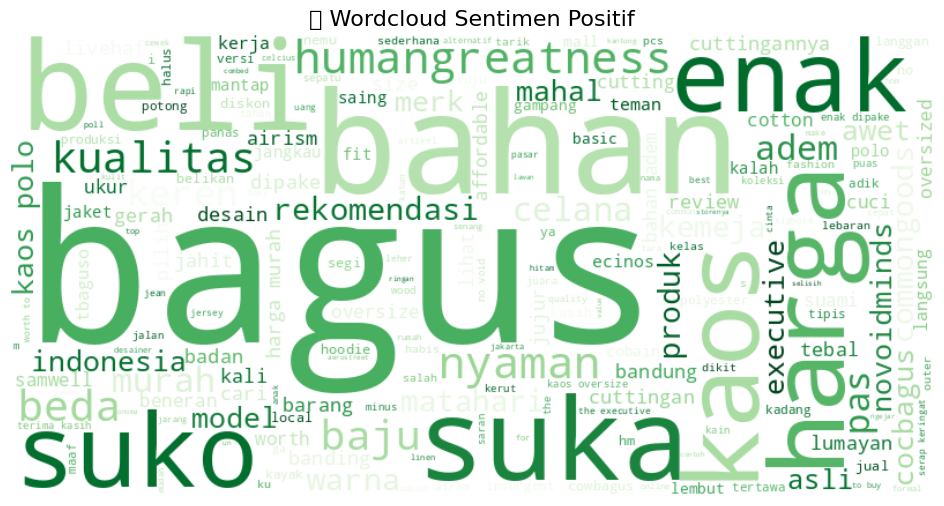

In [ ]:
show_wordcloud(text_pos, "🟢 Wordcloud Sentimen Positif", colormap='Greens')

pada label sentimen positif kata yang sering muncul yaitu seperti, "Bagus", "cuttingannya", "harga", "nyaman", dan yang lainnya. kata itu digunakan dalam komentar untuk mengekspresikan bahwa produk yang dipakai atau dibeli oleh konsumen memenuhi ekspetasi mereka, seperti kualitas bahan maupun harga dari produk tersebut yang biasa disebut ketika membandingkan dengan kualitas dari brand uniqlo.

### Netral

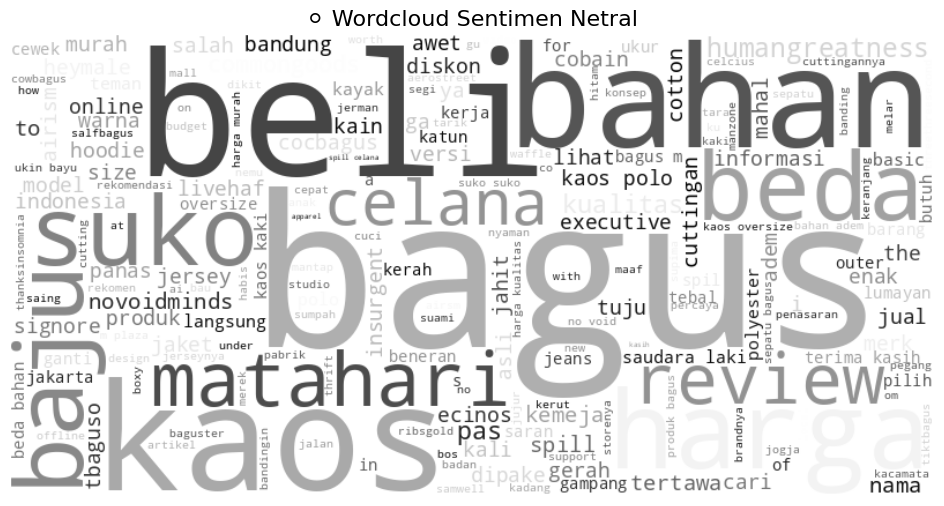

In [ ]:
show_wordcloud(text_net, "⚪ Wordcloud Sentimen Netral", colormap='gray')

pada label sentimen netral kata yang sering muncul seperti "beli", "review", "spill" , "bahan", dan yang lainnya. kombinasi kata ini biasanya digunakan dalam komentar sebagai kalimat permintaan atau pertanyaan tekait produk yang sedang dibahas.

### Negatif

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


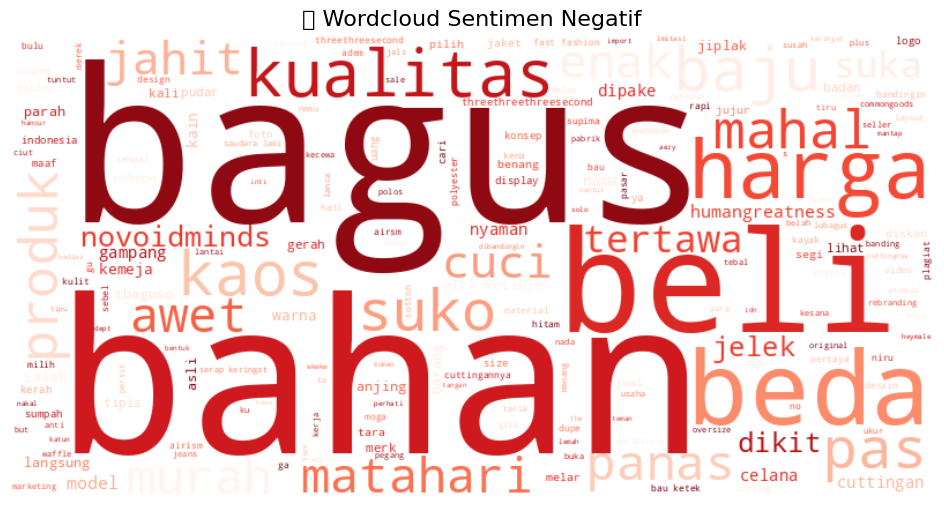

In [ ]:
show_wordcloud(text_neg, '🔴 Wordcloud Sentimen Negatif', 'Reds')

pada label sentimen negatif, kata yang sering muncul seperti "cuci", "panas", "jelek", "jahit", dan yang lainnya. kata tersebut mengekspresikan kekecewaan netizen atau konsumen setelah mencoba/memakai produk tersebut karena tidak memenuhi ekspetasi seperti pada orang lain.

## Pie chart jumlah sentimen

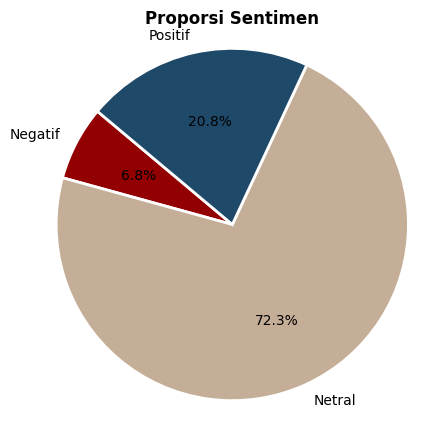

In [ ]:
counts = df['sentimen'].value_counts().sort_index()
labels = ['Negatif', 'Netral', 'Positif']
colors = ['#930002', '#C5AE97', '#1E4969']

plt.figure(figsize=(5, 5))
plt.pie(
    counts,
    labels=labels,
    autopct='%1.1f%%',
    colors=colors,
    startangle=140,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}  # garis putih sebagai pemisah
)
plt.title('Proporsi Sentimen',fontweight='bold')
plt.axis('equal')  # membuat pie jadi bulat
plt.show()

Dari grafik terlihat bahwa sentimen didominasi oleh label netral, dikarenakan orang-orang lebih tertarik untuk menanyakan kualitas brand tertentu kepada satu orang, dibandingkan orang yang memberikan pendapat atas suatu produk dari brand tertentu.

# Brand yang Paling Banyak Dibicarakan di Setiap Platform (Twitter, Instagram, Tiktok)

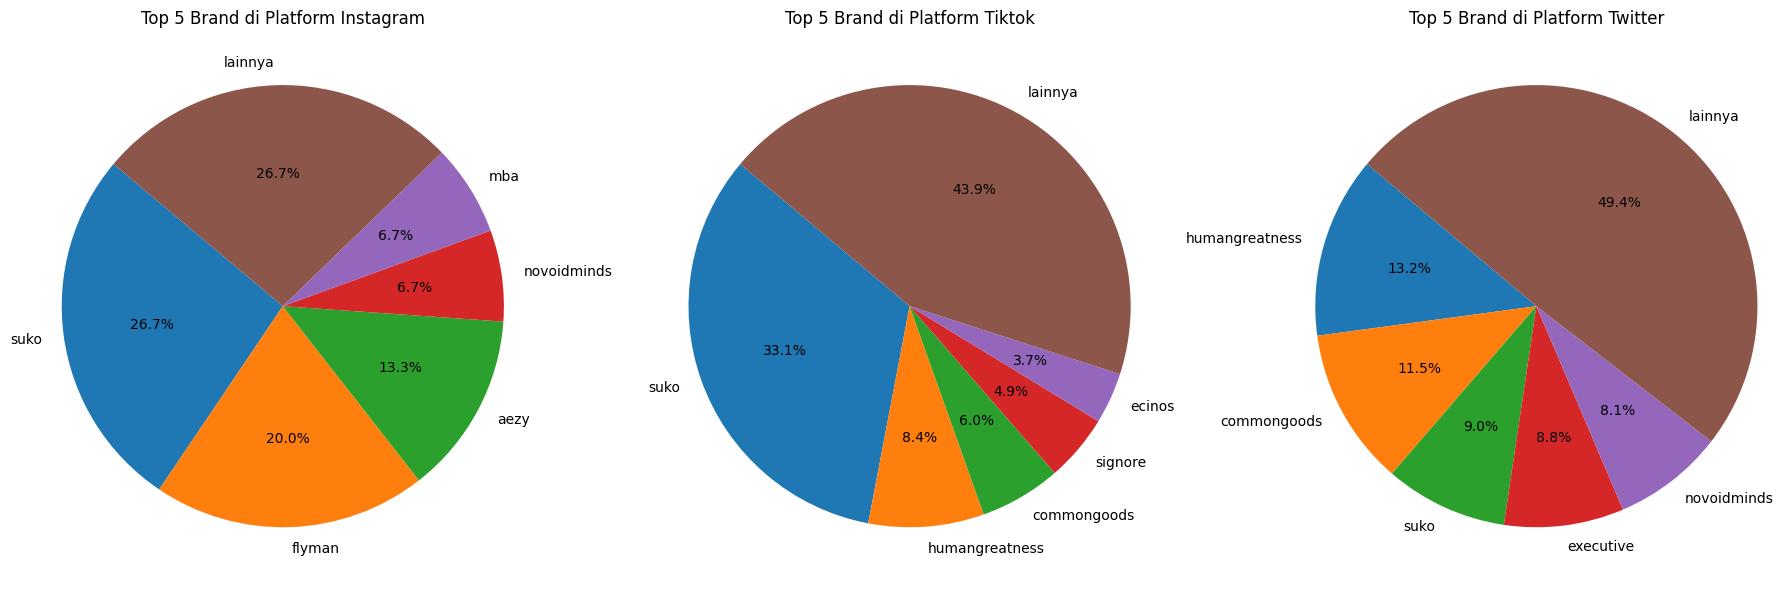

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Ubah ke lowercase dan hapus spasi ekstra
df['brand'] = df['brand'].str.lower().str.strip()
df['platform'] = df['platform'].str.lower().str.strip()

# 2. Pisahkan brand jika digabung dengan koma
df_exploded = df.assign(brand=df['brand'].str.split(',')).explode('brand')
df_exploded['brand'] = df_exploded['brand'].str.strip()

# 3. Hapus brand yang tidak relevan
df_cleaned = df_exploded[~df_exploded['brand'].isin(['uniqlo', 'airism', 'unknown'])]

# 4. Ambil semua platform unik
platforms = df_cleaned['platform'].unique()
n = len(platforms)

# 5. Siapkan plot horizontal
fig, axes = plt.subplots(1, n, figsize=(6 * n, 6))  # 1 baris, n kolom

if n == 1:
    axes = [axes]  # pastikan axes bisa di-iterasi walaupun 1 pie

# 6. Loop tiap platform dan isi subplot
for ax, platform_name in zip(axes, platforms):
    df_platform = df_cleaned[df_cleaned['platform'] == platform_name]
    brand_counts = df_platform['brand'].value_counts()
    top_5 = brand_counts.nlargest(5)
    lainnya = brand_counts.iloc[5:].sum()

    final_counts = top_5.copy()
    if lainnya > 0:
        final_counts['lainnya'] = lainnya

    ax.pie(final_counts, labels=final_counts.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(f"Top 5 Brand di Platform {platform_name.capitalize()}")
    ax.axis('equal')

plt.tight_layout()
plt.show()


- **Instagram** : Suko, Flyman, Aezy, No Void Minds

  Brand Suko dan Flyman mendominasi perbincangan di platform Instagram. Untuk top 3 brand lokal yang sering disebut lainnya seperti Human Greatness dan Common Goods perlu untuk meningkatkan promosi di platform Instagram.
  
- **Tiktok** : Suko, Human Greatness, Common Goods, Signore, Ecinos

  Brand Suko sangat mendominasi perbincangan di platform Tiktok. Sedangkan untuk 3 brand lokal yang sering disebut lainnya seperti Human Greatness dan Common Goods perlu untuk meningkatkan promosi di platform Tiktok.

- **Twitter** : Human Greatness, Common Goods, Suko, Executive, No Void Minds

  Hampir top 5 brand yang paling sebut di platform twitter perbedaannya tidak signifikan. Untuk brand Suko bisa lebih memperkuat promosinya di platform Twitter.



## Top brand lokal yang sering muncul/disebut

/tmp/ipython-input-50-1823274209.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Brand', x='Frequency', data=df_brands, palette='viridis')


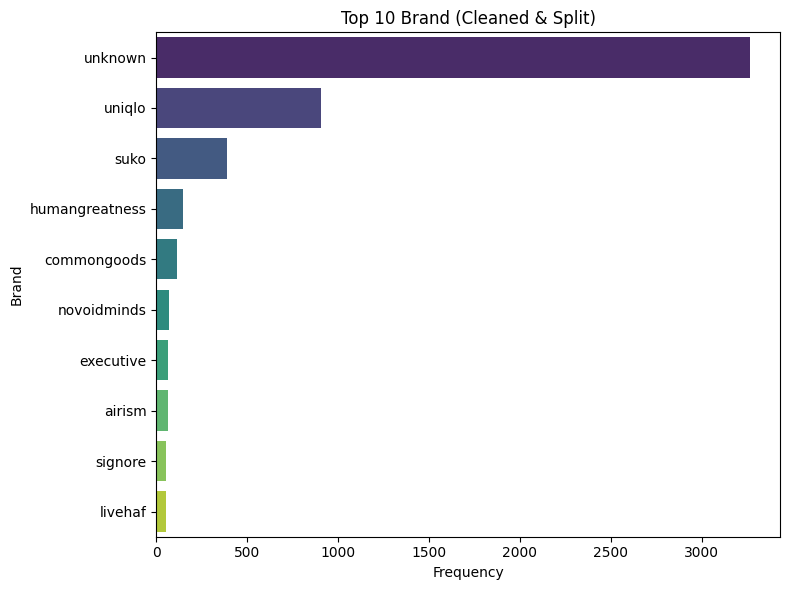

In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Buat list semua brand dari kolom 'brand'
all_brands = []

for val in df['brand']:
    if pd.isna(val):
        continue
    # Pisahkan koma, hilangkan spasi, huruf kecil
    splitted = [b.strip().lower() for b in str(val).split(",")]
    all_brands.extend(splitted)

# 3. Hitung frekuensi
brand_counts = Counter(all_brands)

# 4. Buat DataFrame untuk visualisasi
df_brands = pd.DataFrame(brand_counts.items(), columns=["Brand", "Frequency"])
df_brands = df_brands.sort_values(by="Frequency", ascending=False).head(10)

# 5. Plot
plt.figure(figsize=(8, 6))
sns.barplot(y='Brand', x='Frequency', data=df_brands, palette='viridis')
plt.title("Top 10 Brand (Cleaned & Split)")
plt.xlabel("Frequency")
plt.ylabel("Brand")
plt.tight_layout()
plt.show()


dari hasil plot nya. kita ambil 3 brand yang paling banyak disebut yaitu "Suko", "Human Greatness", dan "Comon Goods". kita lakukan analisis sentimen untuk ke 3 brand lokal tersebut

# Brand "Suko"

In [ ]:
df_suko = df[df['brand'] == "suko"]
df_suko.head(5)

,platform,link,time,username,like,reply,comment,clean_text,text_noslank,sentimen,brand,tokens,stopwords,stemmed
55,instagram,https://www.instagram.com/p/DLkESSWvZk1/?img_i...,2025-07-02,agung_mathijs,0,0,MINISO-SUKO-SUGIONO,MINISOSUKOSUGIONO,miniso suko sugiono,0,suko,"[miniso, suko, sugiono]","[miniso, suko, sugiono]","[miniso, suko, sugiono]"
56,instagram,https://www.instagram.com/p/DLkESSWvZk1/?img_i...,2025-07-02,bobbyvictorsugianto87,7,0,"Saya pecinta Suko, harga terjangkau dibanding ...",Saya pecinta Suko harga terjangkau dibanding s...,saya pecinta suko harga terjangkau dibanding s...,1,suko,"[saya, pecinta, suko, harga, terjangkau, diban...","[pecinta, suko, harga, terjangkau, dibanding, ...","[cinta, suko, harga, jangkau, banding, kualita..."
61,instagram,https://www.instagram.com/p/DLkESSWvZk1/?img_i...,2025-07-02,sagaraja_bennikusyana,0,0,Saya suka SUKO...sampe sekarang juga ga pernah...,Saya suka SUKOsampe sekarang juga ga pernah be...,saya suka suko sampai sekarang juga tidak pern...,1,suko,"[saya, suka, suko, sampai, sekarang, juga, tid...","[suka, suko, beli]","[suka, suko, beli]"
62,instagram,https://www.instagram.com/p/DLkESSWvZk1/?img_i...,2025-07-02,eugene_panji91,4,0,Pertama tahu dan liat brand SUKO di socmed. Is...,Pertama tahu dan liat brand SUKO di socmed Ise...,pertama tahu dan melihat brand suko di sosial ...,1,suko,"[pertama, tahu, dan, melihat, brand, suko, di,...","[suko, sosial, media, iseng, plaza, bagus, m, ...","[suko, sosial, media, iseng, plaza, bagus, m, ..."
98,tiktok,https://vt.tiktok.com/ZSBHemJpQ/,2024-04-13,komeditragisku,18,0,"Coba liat brand Suko ini deh kak,keren2 juga b...",Coba liat brand Suko ini deh kakkeren juga bua...,coba lihat brand suko ini deh kak keren juga b...,1,suko,"[coba, lihat, brand, suko, ini, deh, kak, kere...","[lihat, suko, keren, cowbagus, menurutku]","[lihat, suko, keren, cowbagus, turut]"


In [ ]:
df_suko.shape

(270, 14)

In [ ]:

# 1. Siapkan data
df_suko_filtered = df_suko[df_suko['sentimen'].isin([-1, 0, 1])].copy()
df_suko_filtered['text_joined'] = df_suko_filtered['stemmed'].apply(lambda x: ' '.join(x))

X = df_suko_filtered['text_joined']
y = df_suko_filtered['sentimen']

# 2. TF-IDF_ Vectorizer
vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(X)

# 3. Train model Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_vec, y)

# 4. Ambil bobot fitur
feature_names = np.array(vectorizer.get_feature_names_out())
coefs = model.coef_  # shape: (3, vocab_size) untuk 3 kelas (negatif, netral, positif)

# 5. Tampilkan top kata per sentimen
def top_keywords(class_index, label_name, top_n=10):
    topn = np.argsort(coefs[class_index])[::-1][:top_n]
    print(f"\n🔍 Top {top_n} keywords for '{label_name}':")
    for i in topn:
        print(f"{feature_names[i]:<15} | weight: {coefs[class_index][i]:.4f}")

# 6. Tampilkan
top_keywords(0, 'Negatif')   # baris 0 = kelas -1
top_keywords(1, 'Netral')    # baris 1 = kelas 0
top_keywords(2, 'Positif')   # baris 2 = kelas 1



🔍 Top 10 keywords for 'Negatif':
beda            | weight: 1.2252
malu            | weight: 0.7496
ketiplek        | weight: 0.7468
plek            | weight: 0.7468
plagiat         | weight: 0.6981
kayak           | weight: 0.6888
bahan           | weight: 0.6539
gampang         | weight: 0.5953
identitas       | weight: 0.5729
aneh            | weight: 0.5540

🔍 Top 10 keywords for 'Netral':
suko            | weight: 1.3840
sukoharjo       | weight: 1.2553
matahari        | weight: 1.0405
mana            | weight: 0.6926
jepang          | weight: 0.6159
malang          | weight: 0.5380
salah           | weight: 0.5333
teman           | weight: 0.4770
kesana          | weight: 0.4679
duo             | weight: 0.4529

🔍 Top 10 keywords for 'Positif':
suka            | weight: 1.8747
bagus           | weight: 1.6480
enak            | weight: 0.9649
nyaman          | weight: 0.8458
baju            | weight: 0.7293
suko            | weight: 0.7023
adem            | weight: 0.6854
langgan 

Untuk brand "SUKO" untuk secara kualitas baju sudah bagus dan paling sering disebut karena kualitas nya yang hampir mirip dengan brand Uniqlo.

Namun brand ini memiliki kekurngan nya, terlihat kata yang muncul pada label sentimen negatif nya, yaitu terdapat banyak kata seperti "malu", "beda", "ketiplek dan lainnya. yang menunjukkan bahwa banyak konsumen kecewa dengan konsep yang ditawarkan hampir menjiplak sepenuhnya konsep dari brand uniqlo, terutama dari branding dan offline store yang terlihat mirip. netizen berkomentar bahwa tindakan menjiplak ini takut bisa dikenakan sanksi, dan ada juga yang mengatakan malu karena tidak punya ciri identitas tersendiri.

**Saran:**

Sebaiknya untuk brand lokal SUKO ini mempunyai cara branding tersendiri, agar punya identitas tersendiri tanpa meniru sepenuhnya dari brand lain. Jika bisa dibuat konsep ataupun dari penjualan sendiri bisa saja nantinya melebihi dalam penjualan dibanding brand uniqlo. untuk kualitas bahan bisa dipertahnkan atau pun ditiingkatkan lagi agara konsumen nya juga lebih senang dengan produk yang ditawarkan brand ini.

# Brand "Human Greatness"

In [ ]:
df_human = df[df['brand'] == "humangreatness"]
df_human.head(5)

,platform,link,time,username,like,reply,comment,clean_text,text_noslank,sentimen,brand,tokens,stopwords,stemmed
239,tiktok,https://vt.tiktok.com/ZSBHeU8mE/,2023-12-15,guiltyfuture_,4,0,human greatness gue beli yang premium cotton t...,human greatness gue beli yang premium cotton t...,humangreatness saya beli yang premium cotton t...,0,humangreatness,"[humangreatness, saya, beli, yang, premium, co...","[humangreatness, beli, premium, cotton, kerahn...","[humangreatness, beli, premium, cotton, kerah,..."
240,tiktok,https://vt.tiktok.com/ZSBHJwxPA/,2025-06-17,hendydion,376,35,Bro ini belum pernah cobain Ferret dari Human ...,Bro ini belum pernah cobain Ferret dari Human ...,saudara laki-laki ini belum pernah cobain ferr...,0,humangreatness,"[saudara, laki-laki, ini, belum, pernah, cobai...","[saudara, laki-laki, cobain, ferret, humangrea...","[saudara, laki, cobain, ferret, humangreatness]"
244,tiktok,https://vt.tiktok.com/ZSBHJwxPA/,2025-06-15,oh.sohoo,833,74,Feret Human Greatness paling mendekati sih,Feret Human Greatness paling mendekati sih,feret humangreatness paling mendekati sih,1,humangreatness,"[feret, humangreatness, paling, mendekati, sih]","[feret, humangreatness, mendekati]","[feret, humangreatness, dekat]"
249,tiktok,https://vt.tiktok.com/ZSBHJwxPA/,2025-06-15,a.ra1209,173,7,Lokal terbaek human greatness,Lokal terbaek human greatness,bagus terbaik humangreatness,1,humangreatness,"[bagus, terbaik, humangreatness]","[bagus, terbaik, humangreatness]","[bagus, baik, humangreatness]"
343,tiktok,https://vt.tiktok.com/ZSBHeRQMo/,2025-04-27,morphine1109,0,1,"i wear 500, human greatness,",i wear human greatness,iwear humangreatness,0,humangreatness,"[iwear, humangreatness]","[iwear, humangreatness]","[iwear, humangreatness]"


In [ ]:
df_human.shape

(100, 14)

In [ ]:

# 1. Siapkan data
df_human_filtered = df_human[df_human['sentimen'].isin([-1, 0, 1])].copy()
df_human_filtered['text_joined'] = df_human_filtered['stemmed'].apply(lambda x: ' '.join(x))

X = df_human_filtered['text_joined']
y = df_human_filtered['sentimen']

# 2. TF-IDF_ Vectorizer
vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(X)

# 3. Train model Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_vec, y)

# 4. Ambil bobot fitur
feature_names = np.array(vectorizer.get_feature_names_out())
coefs = model.coef_  # shape: (3, vocab_size) untuk 3 kelas (negatif, netral, positif)

# 5. Tampilkan top kata per sentimen
def top_keywords(class_index, label_name, top_n=10):
    topn = np.argsort(coefs[class_index])[::-1][:top_n]
    print(f"\n🔍 Top {top_n} keywords for '{label_name}':")
    for i in topn:
        print(f"{feature_names[i]:<15} | weight: {coefs[class_index][i]:.4f}")

# 6. Tampilkan
top_keywords(0, 'Negatif')   # baris 0 = kelas -1
top_keywords(1, 'Netral')    # baris 1 = kelas 0
top_keywords(2, 'Positif')   # baris 2 = kelas 1



🔍 Top 10 keywords for 'Negatif':
malas           | weight: 0.5569
cuti            | weight: 0.4948
aku             | weight: 0.4948
lebar           | weight: 0.3498
oversizednya    | weight: 0.3498
samping         | weight: 0.3498
cuttingan       | weight: 0.3498
sobek           | weight: 0.3498
parah           | weight: 0.3157
hitam           | weight: 0.3157

🔍 Top 10 keywords for 'Netral':
humangreatness  | weight: 0.6729
iwear           | weight: 0.4503
ngomong         | weight: 0.3288
basic           | weight: 0.3285
hoodie          | weight: 0.3226
cobain          | weight: 0.3223
pilih           | weight: 0.2930
rekomendasi     | weight: 0.2827
arkline         | weight: 0.2827
andal           | weight: 0.2827

🔍 Top 10 keywords for 'Positif':
bagus           | weight: 1.2365
baik            | weight: 0.7253
suka            | weight: 0.6631
nyaman          | weight: 0.5715
feret           | weight: 0.5018
enak            | weight: 0.4710
pas             | weight: 0.4462
top     

Untuk brand "Human Greatness" ini sudah bagus secara bahan dan sering muncul juga ketika orang sedang membahas atau membandingkan brand unqilo dengan lokal.

Dari label sentimen negatif untuk brand ini terdapat beberapa kata seperti "cuttingan", oversizednya", "lebar", dan lainnya. kata ini menjelaskan bahwa konsumen kurang suka atau kurang cocok  dengan cuttingan yang ditawarkan oleh brand ini.

**Saran:**
untuk saran kepada brand ini, mungkin bisa dibuat jenis cuttingan baju yang lain, seperti reguler atau yang lainnya. saran ini juga digunakan agar cuttingan sized produk ini bisa lebih bervariasi. dan untuk kualitas bahan juga perlu lebih teliti lagi dikarenakan beberapa ada yang mengeluhkan tentang barang yang cacat seperti "sobek".

# Brand "Common Goods"

In [ ]:
df_common = df[df['brand'] == "commongoods"]
df_common.head(5)

,platform,link,time,username,like,reply,comment,clean_text,text_noslank,sentimen,brand,tokens,stopwords,stemmed
184,tiktok,https://vt.tiktok.com/ZSBHeRQMo/,2025-04-29,bcrucis,1,0,Common goods!,Common goods,commongoods,0,commongoods,[commongoods],[commongoods],[commongoods]
185,tiktok,https://vt.tiktok.com/ZSBHeRQMo/,2025-04-29,sw_wo,5,0,"Common Goods, thank me later 😎",Common Goods thank me later,commongoods thank me later,0,commongoods,"[commongoods, thank, me, later]","[commongoods, thank, me, later]","[commongoods, thank, me, later]"
194,tiktok,https://vt.tiktok.com/ZSBHeRQMo/,2025-04-30,jojor0ck,1,0,Commongoods emg se mantep itu kualitasnya 🔥,Commongoods emg se mantep itu kualitasnya,commongoods memang se mantap itu kualitasnya,1,commongoods,"[commongoods, memang, se, mantap, itu, kualita...","[commongoods, mantap, kualitasnya]","[commongoods, mantap, kualitas]"
199,tiktok,https://vt.tiktok.com/ZSBHeRQMo/,2025-04-30,velixas,3,0,commongoods boleh dicoba sih. yang airytech am...,commongoods boleh dicoba sih yang airytech ama...,commongoods boleh dicoba x yang airytec sama s...,0,commongoods,"[commongoods, boleh, dicoba, x, yang, airytec,...","[commongoods, dicoba, airytec, supersoft]","[commongoods, coba, airytec, supersoft]"
390,tiktok,https://vt.tiktok.com/ZSBHdMTKb/,2023-12-06,sw_wo,76,1,"kece banget common goods, pokoknya maju terus ...",kece banget common goods pokoknya maju terus b...,kece banget commongoods pbagusbagusnya maju te...,0,commongoods,"[kece, banget, commongoods, pbagusbagusnya, ma...","[kece, commongoods, pbagusbagusnya, maju, bagu...","[kece, commongoods, pbagusbagusnya, maju, bagu..."


In [ ]:
df_common.shape

(81, 14)

In [ ]:

# 1. Siapkan data
df_common_filtered = df_common[df_common['sentimen'].isin([-1, 0, 1])].copy()
df_common_filtered['text_joined'] = df_common_filtered['stemmed'].apply(lambda x: ' '.join(x))

X = df_common_filtered['text_joined']
y = df_common_filtered['sentimen']

# 2. TF-IDF_ Vectorizer
vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(X)

# 3. Train model Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_vec, y)

# 4. Ambil bobot fitur
feature_names = np.array(vectorizer.get_feature_names_out())
coefs = model.coef_  # shape: (3, vocab_size) untuk 3 kelas (negatif, netral, positif)

# 5. Tampilkan top kata per sentimen
def top_keywords(class_index, label_name, top_n=10):
    topn = np.argsort(coefs[class_index])[::-1][:top_n]
    print(f"\n🔍 Top {top_n} keywords for '{label_name}':")
    for i in topn:
        print(f"{feature_names[i]:<15} | weight: {coefs[class_index][i]:.4f}")

# 6. Tampilkan
top_keywords(0, 'Negatif')   # baris 0 = kelas -1
top_keywords(1, 'Netral')    # baris 1 = kelas 0
top_keywords(2, 'Positif')   # baris 2 = kelas 1



🔍 Top 10 keywords for 'Negatif':
kerut           | weight: 0.7059
goods           | weight: 0.5334
rapi            | weight: 0.4748
jahit           | weight: 0.3894
bahan           | weight: 0.3600
proses          | weight: -0.0103
order           | weight: -0.0103
packing         | weight: -0.0103
malas           | weight: -0.0103
cs              | weight: -0.0103

🔍 Top 10 keywords for 'Netral':
commongoods     | weight: 0.6458
mana            | weight: 0.3377
airytech        | weight: 0.2868
baik            | weight: 0.2806
setrika         | weight: 0.2579
reng            | weight: 0.2398
seri            | weight: 0.2083
supersoft       | weight: 0.2073
coba            | weight: 0.2073
me              | weight: 0.2068

🔍 Top 10 keywords for 'Positif':
bagus           | weight: 0.9631
suka            | weight: 0.6151
enak            | weight: 0.5672
kaos            | weight: 0.4929
oversize        | weight: 0.4512
cuttingan       | weight: 0.3645
asli            | weight: 0.3554
cuc

Untuk brand "Common goods" ini sudah bagus secara kualitas bahan produknya, karena brand ini sering muncul dan disebut ketika membahas atau membandingkan dengan brand Uniqlo

pada label sentimen negatif terdapat kata  "proses", "packing", "order", dan lainnya. kata ini menjelaskan bahwa beberapa konsumen mengeluhkan pada proses packaging ataupun pengiriman. karena toko ini hanya menjual melalui online, jadi untuk pembelian tidak bisa langsung sampai ke tangan konsumen.

**Saran:**

untuk brand "Common goods" mungkin bisa memilih kurir yang menyediakan beberapa pilihan pengantaran, seperti next day atau pun yang reguler. supaya konsumen yang membeli bisa memilih opsi pengantaran yang dimau. dan untuk packaging bisa ditingkatkan dengan cara membuat tracking yang jelas, dan menambah lapisan pada produk agar barang bisa sampai dengan aman ke tangan konsumen

# Tren Waktu untuk Top 3 Brand yang Paling Sering Muncul/Disebut (Suko, Human Greatness, Common Goods)

## Brand Suko

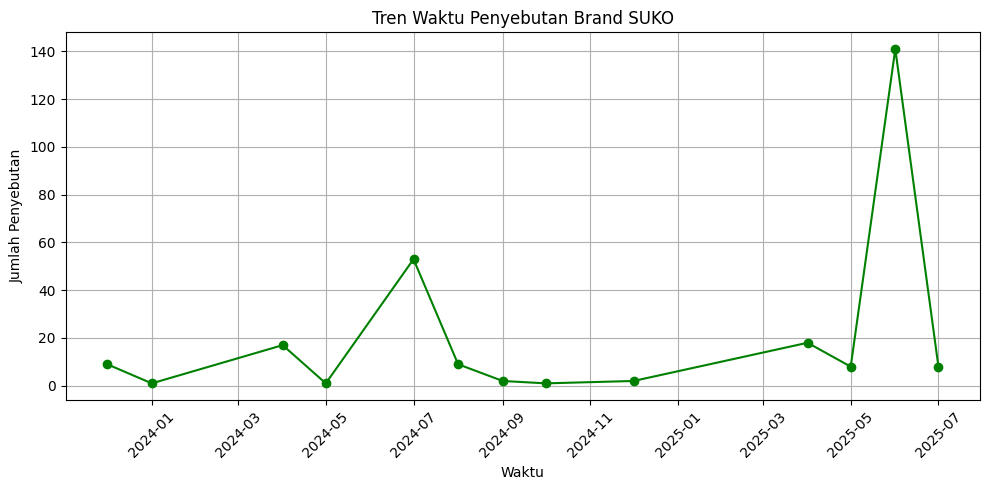

In [ ]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

# 1. Fungsi parsing brand
def parse_brand(x):
    try:
        if isinstance(x, str) and x.startswith("["):
            return [str(b).strip().lower() for b in ast.literal_eval(x)]
        elif isinstance(x, list):
            return [str(b).strip().lower() for b in x]
        elif isinstance(x, str):
            return [x.strip().lower()]
        else:
            return []
    except:
        return []

# 2. Parsing brand list
df['brand_list'] = df['brand'].apply(parse_brand)

# 3. Pastikan kolom 'time' jadi datetime
df['time'] = pd.to_datetime(df['time'], errors='coerce')

# 4. Explode ke satu brand per baris
df_exploded = df.explode('brand_list').copy()
df_exploded['brand'] = df_exploded['brand_list'].astype(str).str.strip().str.lower()
df_exploded.drop(columns=['brand_list'], inplace=True)

# 5. Filter hanya brand suko
df_suko = df_exploded[df_exploded['brand'] == 'suko'].copy()

# 6. Pastikan kolom waktu di df_suko juga datetime
df_suko['time'] = pd.to_datetime(df_suko['time'], errors='coerce')

# 7. Kelompokkan berdasarkan waktu (bulanan)
trend = df_suko.groupby(df_suko['time'].dt.to_period('M')).size()
trend.index = trend.index.to_timestamp()  # ubah period ke datetime

# 8. Plot tren waktu
plt.figure(figsize=(10, 5))
plt.plot(trend.index, trend.values, marker='o', color='green')
plt.title('Tren Waktu Penyebutan Brand SUKO')
plt.xlabel('Waktu')
plt.ylabel('Jumlah Penyebutan')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Berdasarkan tren waktu jumlah postingan brand Suko di media sosial, terlihat adanya lonjakan tajam pada bulan Mei dan Juni 2025. Puncak diskusi terjadi pada tanggal X dengan total 60+ postingan dalam sehari, mengindikasikan adanya event, campaign, atau viralitas tertentu yang meningkatkan awareness terhadap brand Suko.

## Brand Human Greatness

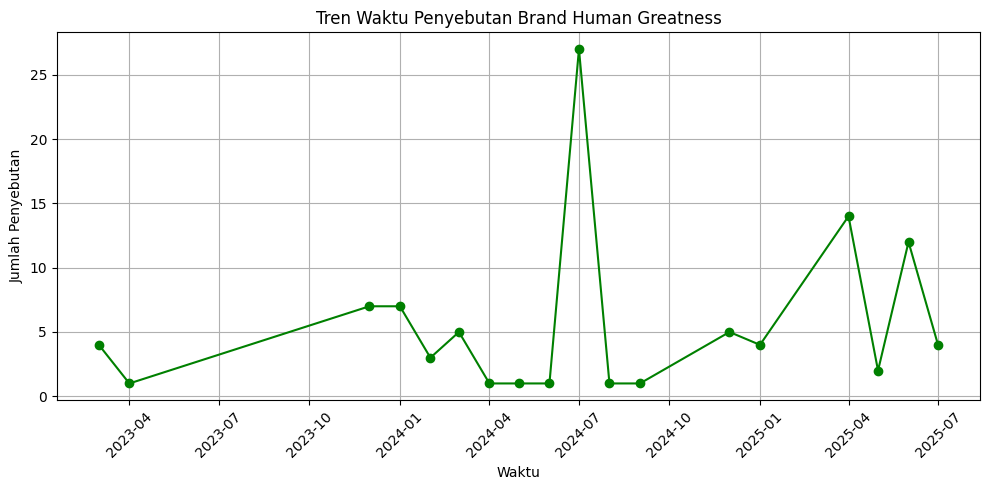

In [ ]:

# 5. Filter hanya brand human greatness
df_hg = df_exploded[df_exploded['brand'] == 'humangreatness'].copy()

# 6. Pastikan kolom waktu di df_hg juga datetime
df_hg['time'] = pd.to_datetime(df_hg['time'], errors='coerce')

# 7. Kelompokkan berdasarkan waktu (bulanan)
trend = df_hg.groupby(df_hg['time'].dt.to_period('M')).size()
trend.index = trend.index.to_timestamp()  # ubah period ke datetime

# 8. Plot tren waktu
plt.figure(figsize=(10, 5))
plt.plot(trend.index, trend.values, marker='o', color='green')
plt.title('Tren Waktu Penyebutan Brand Human Greatness')
plt.xlabel('Waktu')
plt.ylabel('Jumlah Penyebutan')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Berdasarkan tren waktu jumlah postingan brand Human Greatness di media sosial, terlihat adanya lonjakan tajam pada bulan Juli 2024. Puncak diskusi terjadi pada tanggal 28 Juli 2024 dengan total 14 postingan dalam sehari, yang mengindikasikan adanya event, campaign, atau viralitas tertentu yang meningkatkan awareness terhadap brand Human Greatness

## Common Goods

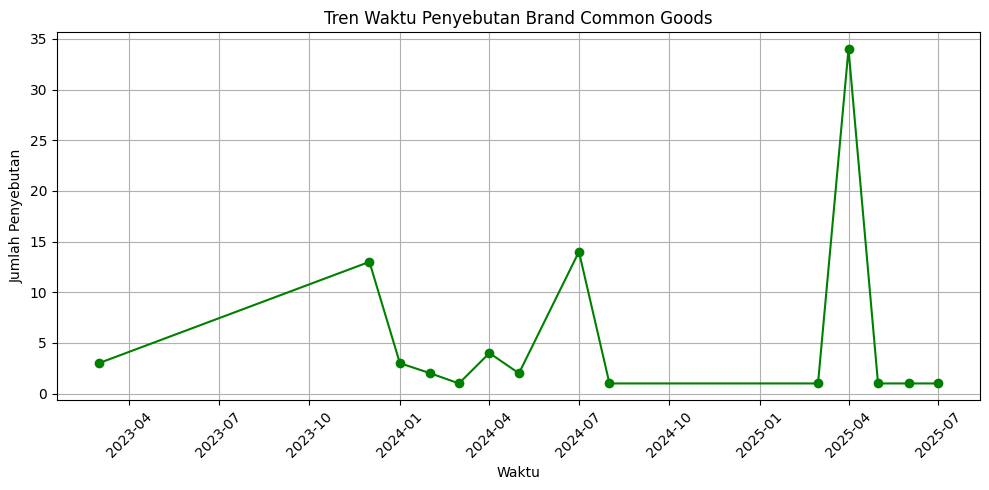

In [ ]:

# 5. Filter hanya brand common goods
df_cg = df_exploded[df_exploded['brand'] == 'commongoods'].copy()

# 6. Pastikan kolom waktu di df_cg juga datetime
df_cg['time'] = pd.to_datetime(df_cg['time'], errors='coerce')

# 7. Kelompokkan berdasarkan waktu (bulanan)
trend = df_cg.groupby(df_cg['time'].dt.to_period('M')).size()
trend.index = trend.index.to_timestamp()  # ubah period ke datetime

# 8. Plot tren waktu
plt.figure(figsize=(10, 5))
plt.plot(trend.index, trend.values, marker='o', color='green')
plt.title('Tren Waktu Penyebutan Brand Common Goods')
plt.xlabel('Waktu')
plt.ylabel('Jumlah Penyebutan')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Berdasarkan tren waktu jumlah postingan brand Common Goods di media sosial, terlihat adanya lonjakan tajam pada bulan April 2025. Puncak diskusi terjadi pada tanggal 15 April 2025 dengan total 25 postingan dalam sehari, yang mengindikasikan adanya event, campaign, atau viralitas tertentu yang berhasil meningkatkan awareness terhadap brand Common Goods

# Saran



Berdasarkan hasil analisis topik yang telah dilakukan, terdapat beberapa faktor utama yang perlu diperhatikan oleh merek pakaian lokal untuk meningkatkan kualitas dan penjualan:

- Faktor Konsep Brand

Merek pakaian lokal diharapkan mampu membangun konsep dan identitas yang unik agar memiliki ciri khas tersendiri. Tidak perlu meniru brand internasional untuk mendapatkan perhatian pasar—justru dengan memperkuat kualitas dan karakter lokal, brand bisa membuktikan diri mampu bersaing secara mandiri.

- Faktor Bahan dan Ragam Produk

Diharapkan merek lokal dapat menghadirkan lebih banyak variasi dalam jenis produk, seperti model potongan (cutting), ukuran (size), dan desain. Selain itu, kualitas bahan dan ketelitian dalam proses produksi—terutama pada tahap penjahitan—perlu ditingkatkan guna meminimalkan produk cacat dan meningkatkan kepuasan pelanggan.

- Faktor Packaging dan Pengiriman

Proses pengemasan produk perlu ditingkatkan, misalnya dengan menambahkan lapisan pelindung serta elemen menarik seperti stiker atau paperbag yang kreatif dan estetik. Karena sebagian besar brand lokal menjual produknya secara online, penting juga untuk menyediakan sistem pelacakan (tracking) yang jelas dan transparan, agar pembeli dapat memantau status pengiriman barang mereka secara real-time.



# Kesimpulan

Banyak brand lokal Indonesia sudah memiliki kualitas yang baik dan mampu bersaing dengan brand internasional. Beberapa di antaranya telah memiliki toko fisik (offline store), sementara lainnya hanya dijual secara online.

Brand lokal juga menawarkan ciri khas tersendiri melalui berbagai koleksi yang mereka rilis. Salah satu keunggulan utama adalah harga yang relatif lebih terjangkau, bahkan bisa mencapai setengah dari harga brand internasional seperti Uniqlo.

Meskipun masih terdapat beberapa aspek yang perlu diperbaiki dan ditingkatkan ke depannya, potensi dan perkembangan brand lokal sangat menjanjikan. Dukungan dari konsumen menjadi salah satu kunci penting dalam mendorong pertumbuhan ini.#BanggaPakaiLokal

